## Table of contents

1. [Introduction](#Introduction)

2. [Importing Modules](#Importing-Modules)

3. [Descriptive Models (Visualization)](#Descriptive-Models-(Visualization))

    3.1 [PCA](#PCA)
    
    3.2 [Clustering](#Clustering)
    
    &nbsp;&nbsp;&nbsp;&nbsp;3.2.1 [Elbow Method](#Elbow-Method)
    
    &nbsp;&nbsp;&nbsp;&nbsp;3.2.2 [K-Means](#K-Means)
    
    &nbsp;&nbsp;&nbsp;&nbsp;3.2.3 [Spectral Clustering](#Spectral-Clustering)
    
    &nbsp;&nbsp;&nbsp;&nbsp;3.2.4 [DBScan](#DBScan)

4. [Predictive](#Predictive)
    
    4.1 [Algorithms](#Algorithms)

    &nbsp;&nbsp;&nbsp;&nbsp;4.1.1 [Logistic Regression Algorithm](#Logistic-Regression-Algorithm)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.1.2 [Random Forest Algorithm](#Random-Forest-Algorithm)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.1.3 [SVM Algorithm](#SVM-Algorithm)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.1.4 [Light GBM Algorithm](#Light-GBM-Algorithm)
    
    4.2 [Barplots of all algorithms](#Barplots-of-all-algorithms)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.1 [Logistic Regression](#Logistic-Regression)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.2 [Random Forest](#Random-Forest)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.3 [SVM](#SVM)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.2.4 [Light GBM](#Light-GBM)
   
    4.3 [Comparisons between best algorithms](#Comparisons-between-best-algorithms)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.3.1 [Fit Time](#Fit-Time)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.3.2 [F1 Measure](#F1-Measure)
   
    &nbsp;&nbsp;&nbsp;&nbsp;4.3.3 [Accuracy](#Accuracy)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.3.4 [Precision](#Precision)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.3.5 [Recall](#Recall)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.3.6 [ROC-AUC](#ROC-AUC)
    
    4.4 [Best Algorithms](#Best-Algorithms)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.4.1 [ROC Curves](#ROC-Curves)
    
    &nbsp;&nbsp;&nbsp;&nbsp;4.4.2 [P-R Plots](#P-R-Plots)
    
5. [Conclusion](#Conclusion)

## Introduction

In this notebook, we look forward to diving deep into the Descriptive and Predictive part of the project to visualize how our dataset is distributed, and predict if a loan will be successful or not. Several clustering techniques and models were used and, to better comprehend the results given, we typically created many plots.

### Importing Modules

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.cluster import DBSCAN
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, make_scorer
from statistics import mean
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

We start by creating a variable called `features` that will hold the features used by the models and the clustering algorithms, according to the results obtained in the previous notebooks. Here we also define a function to read the train data and we change the `status` that previously was equal to `-1` to `1` and those who had a status of `1` now become `0`. This way, the positive class is, as it makes sense, `1`.

In [15]:
# Model selected features
features = ['reached_negative_balance', 'RAB_mean', 'ratio_RAB', 'credit_ratio', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max', 'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_mean']

X_test_full = pd.read_csv("./preprocessed/mergedTestData.csv")
X_test_pred = X_test_full[features]

def read_clustering_data():
  X_train_full = pd.read_csv("./preprocessed/mergedTrainData.csv")
  X_train = X_train_full[features]

  # Positive class now is 1 and negative class now is 0
  X_train_full.loc[X_train_full["status"] == 1, "status"] = 0
  X_train_full.loc[X_train_full["status"] == -1, "status"] = 1

  y_train = X_train_full.status

  return [X_train, y_train]

# Descriptive Models (Visualization)

### PCA
The beginning of the Descriptive task uses the Principle Component Analysis, more commonly known as **PCA**, which is a way to reduce the number of variables while maintaining the majority of the important information. It transforms several variables that may be correlated into a smaller number of uncorrelated variables, known as **principal components**.

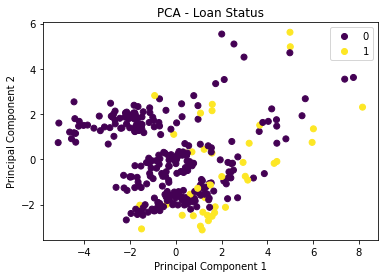

In [8]:
[X_train, y_train] = read_clustering_data()

pca = PCA(n_components=2)
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipeline.fit_transform(X_train)
scatter = plt.scatter(components[:,0],  components[:,1], c=y_train)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Loan Status")

labels = np.unique(y_train)
handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

With the above plot, we try to understand how data is distributed according to the `status` of each loan. As we can see, there isn't a clear distinction between each type of loan. So the conclusion here is, that we will need to arrange better techniques to deal with the data visualization. Still, we think it's to understand the development of the Descriptive process. This time, instead of using 2 Principal Components, let's try to use 3 Principal Components, therefore, getting a 3D plot.

In [9]:
[X_train, y_train] = read_clustering_data()

pca = PCA(n_components=3)
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipeline.fit_transform(X_train)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

This time, we start to get a perception that there is some kind of border between each type of loan, which is easier to see in 3D plots. As for the explained variance, it's a metric that evaluates the usefulness of Principal Components. 58.60% is ok, in this case. The next part of the process was to take a step back and check if the combination of 2 Principal Components could give us some more information on how loans were distributed according to each type. Therefore, we created a grid that combined several Principal Components.

In [10]:
[X_train, y_train] = read_clustering_data()

n_components = 4
pca = PCA(n_components)
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipeline.fit_transform(X_train)
labels = {
    str(i): f"PC{i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(n_components),
    color=y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

As you would imagine, it continues to be hard to to get to a fair conclusion as the yellow and blue points are too merged together. Regarding the plot, the number in parenthesis indicates the explained variance of a Principal Component. The final plot regarding the use of PCA has to do with how the increase of Principal Components affects the explained variance metric.

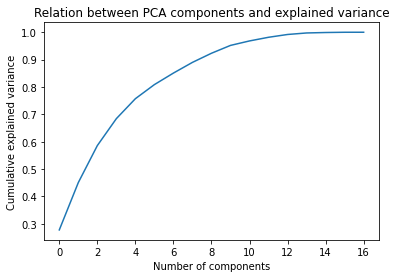

In [11]:
[X_train, y_train] = read_clustering_data()

pca = PCA()
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
components = pipeline.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Relation between PCA components and explained variance")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

A vital part of using PCA is the ability to estimate how many components are needed to describe the data and this can be determined by looking at the cumulative explained variance.
This curve quantifies how much of the total, 17-dimensional variance is contained within the first N components. For example, we see that with the digits the first 4 components contain approximately 75% of the variance, while you need around 12 components to describe close to 100% of the variance. Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 8 components to retain 90% of the variance. Looking at this plot for a high-dimensional dataset can help understand the level of redundancy present in multiple observations.

## Clustering
For the clustering part, we used 3 algorithms which we will further detail: **K-Means**, **Spectral Clustering**, and **DBScan**. The clustering process aimed to discover the cluster to which each client belongs.

### Elbow Method
The Elbow method is a heuristic used to determine the number of clusters in a dataset. In this case, we relate the WCSS, the sum of the squared error (**SSE**), with the number of clusters needed. More specifically, the **SSE** is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of a clustering algorithm is to try to minimize this value. Therefore, we pick the right number of clusters based on the point where the next number of clusters has a small slope when diminishing the WCSS according to the number of clusters. In this case, although it's a bit hard to decide the right number of clusters to use because the plot seems a curve, we chose to create 3 clusters.

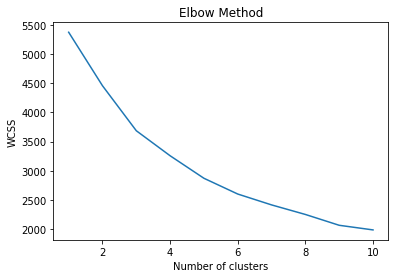

In [12]:
[X_train, y_train] = read_clustering_data()
wcss = []

X_train = StandardScaler().fit_transform(X_train)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K-Means
K-means, as a data-clustering algorithm, is ideal for discovering globular clusters, where all members of each cluster are in close proximity to each other, in the Euclidean sense. 

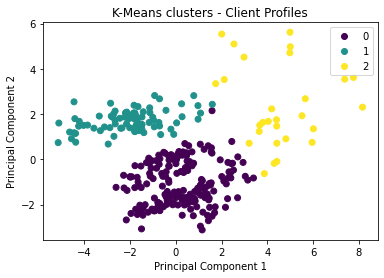

 client_profile  balance_min  balance_max  balance_mean  balance_std  ratio_IC  ratio_CC  ratio_CAB  ratio_WC  ratio_RAB  ratio_CCW
              0      -3424.6     164648.6  42987.383333 18403.157015  0.184174  0.262032   0.000900  0.448984   0.102872   0.001038
              1        200.0     139880.9  46453.865427 17916.180608  0.186659  0.036247   0.182572  0.492951   0.100944   0.000626
              2        200.0     123310.1  37281.211185 17166.437230  0.337326  0.326596   0.083585  0.248276   0.004216   0.000000


In [19]:
[X_train, y_train] = read_clustering_data()
                        
X_train = StandardScaler().fit_transform(X_train)
kmeans = KMeans(n_clusters=3, random_state=4).fit(X_train)
clientProfiles = kmeans.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
scatter = plt.scatter(components[:,0], components[:,1], c=clientProfiles)
plt.title("K-Means clusters - Client Profiles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

labels = np.unique(kmeans.labels_)
handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

# Train Data
merge_train_data = pd.read_csv("./preprocessed/mergedTrainData.csv", sep=",")
merge_train_data["client_profile"] = clientProfiles
merge_train_data.to_csv("./preprocessed/mergedTrainData.csv", index=None)

# Balance Analysis
agg_types = merge_train_data.sort_values(by=['client_profile'], ascending=[True]) \
                          .groupby(['client_profile']) \
                          .agg({
                              'balance_min': ['min'],
                              'balance_max': ['max'],
                              'balance_mean': ['mean'],
                              'balance_std': ['mean'],
                              'ratio_IC': ['mean'],
                              'ratio_CC': ['mean'],
                              'ratio_CAB': ['mean'],
                              'ratio_WC': ['mean'],
                              'ratio_RAB': ['mean'],
                              'ratio_CCW': ['mean']        
                          }) \
                          .reset_index()

agg_types.columns = ['client_profile', 'balance_min', 'balance_max', 'balance_mean', 'balance_std', 'ratio_IC', 'ratio_CC', 'ratio_CAB', 'ratio_WC', 'ratio_RAB', 'ratio_CCW']
print(agg_types.to_string(index=False))

As we can see from the above plot, we created 3 distinct clusters that describe 3 different types of clients. As the features used are mostly related to the transactions data, we can create those clusters. We first use K-Means to obtain the clusters associated with each client and then we use PCA to reduce the dimension of our dataset into 2 dimensions and assign each data point to the respective cluster. The K-Means was our best algorithm with regards to the clustering task. Those were the results for the train data. At the bottom, we can find some statistics regarding each client profile namely the average minimum balance, maximum balance, mean balance, and respective standard deviation. Furthermore, there are also some statistics regarding the type of operations each one performs: Interest Credited (IC), Credit in Cash (CC), Collection from another Bank (CAB), Withdrawal in Cash (WC), Remittance to another Bank (RAB), and Credit Card Withdrawal (CCW). Clusters 1 and 2 are the biggest ones, as we can see from the above plot. They are all very different in terms of the distribution of transactions between each client. Cluster 2 seems to have a low ratio of Withdrawal in Cash when compared to the other clusters, but they have more frequent operations regarding Credit in Cash and Interests Credited, which means they probably handle their savings more efficiently. Regarding the balances, cluster number 1 works with higher balances according to the mean balance, and cluster 0 has clients that reached negative balances which can be a strong indicator of a division in different client profiles.

For the test data, we obtained the results presented in the next plot. 

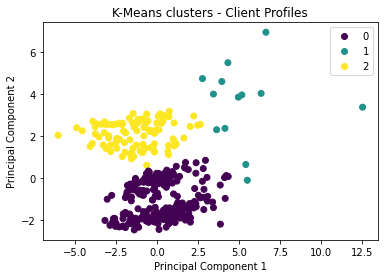

In [80]:
X_test_data = StandardScaler().fit_transform(X_test_pred)
kmeans = KMeans(n_clusters=3, random_state=4).fit(X_test_data)
clientProfiles = kmeans.labels_

pca = PCA(n_components=2)
components = pca.fit_transform(X_test_data)
scatter = plt.scatter(components[:,0], components[:,1], c=clientProfiles)
plt.title("K-Means clusters - Client Profiles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

labels = np.unique(kmeans.labels_)
handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

# Test Data
merge_test_data = pd.read_csv("./preprocessed/mergedTestData.csv", sep=",")
merge_test_data["client_profile"] = clientProfiles
merge_test_data.to_csv("./preprocessed/mergedTestData.csv", index=None)

In both the train and test datasets, we add the clusters data, as it will be later used in the predictive models.

# Spectral Clustering
Spectral Clustering is a very useful clustering algorithm for when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

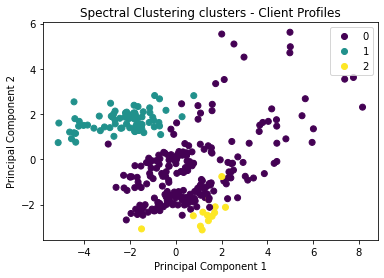

In [81]:
[X_train, y_train] = read_clustering_data()

X_train = StandardScaler().fit_transform(X_train)
kmeans = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=4)
labels = kmeans.fit_predict(X_train)                          

pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
scatter = plt.scatter(components[:,0], components[:,1], c=labels)
plt.title("Spectral Clustering clusters - Client Profiles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

labels = np.unique(labels)
handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
plt.show()

As we can see from the above plot, the points disposition is exactly the same as for the K-Means plot with the train data, but the division in clusters is not suitable for our problem, and for that reason, we can conclude that the Spectral Clustering algorithm is not the right choice here.

# DBScan
DBSCAN, or Density-Based Spatial Clustering of Applications with Noise finds core samples of high density and expands clusters from them. It's generally good for data that contains clusters of similar density. In this case, as we can't specify the number of clusters we want, we used an *epsilon* of `0.65` and a minimum number of samples in a neighborhood for a point to be considered as a core point of 8. We obtain 4 different clusters and all the blue points are noise points, which means they are neither border nor core points.

In [82]:
[X_train, y_train] = read_clustering_data()

X_train = StandardScaler().fit_transform(X_train)

pca = PCA(n_components=3)
components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(components, columns=['pc1', 'pc2', 'pc3'])

db = DBSCAN(eps=0.65, min_samples=8).fit(pca_df)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labels,
    title=f"DBScan Clustering - {no_clusters} clusters and {no_noise} noise points",
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

Having ended the descriptive part, as mentioned in the K-Means section, we add the new `client_profile` feature to later be used by our models.

In [83]:
X_test_pred["client_profile"] = clientProfiles
features.append("client_profile")

/tmp/ipykernel_8964/2103385979.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Predictive
For the predictive part of the project, we used several algorithms: **Logistic Regression**, **Random Forest**, **Support Vector Machines (SVM)**, and **Light GBM**. In the `run_model` function, we perform Cross-Validation with `RepeatedStratifiedKFold`, hyperparameter tuning with the `GridSearch` and we end up with our best estimator according to the AUC (Area Under the Curve) metric. After that, we advance to the predictions part. In the `load_data` function, we split the train set into 75% of training data and 25% of testing data with the `train_test_split` method and in a stratified way, meaning we keep the balance between loans that got different endings. Our best estimator is then used against our testing data and we produce ROC Curves and Precision-Recall plots with the predicted values. Furthermore, we also calculate several metrics related to each iteration of the `GridSearch` process, namely: fit time, accuracy, precision, recall, AUC, and F1 Measure. Finally, we also created functions that helped us to automate the encoding of variables and produce ROC Curves and Precision-Recall plots for several algorithms at a time.

In [84]:
algorithms = []
metrics = {}
plots_data = {}

scoring = {
  "precision_score": make_scorer(precision_score, zero_division=0),
  "recall_score": "recall",
  "roc_auc_score": "roc_auc",
  "f1_score": "f1",
  "accuracy_score": "accuracy",
}

def run_model(pipeline, param_grid, X_train, y_train, X_test_pred, clfName, X_test=[], y_test=[]):
  global algorithms, metrics, plots_data
  
  # Define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
    scoring=scoring, n_jobs=-1, cv=cv, refit="roc_auc_score")

  grid_result = grid.fit(X_train, y_train)
  print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

  # Evaluate the model
  p_pred = grid_result.predict_proba(X_test_pred)

  # ROC Curve & PR 
  estimator = grid_result.best_estimator_

  if SAMPLING:
    plots_data[clfName] = [estimator, X_test, y_test]
    
    RocCurveDisplay.from_estimator(estimator, X_test, y_test)
    PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test)
  else:
    plots_data[clfName] = [estimator, X_train, y_train]
    
    RocCurveDisplay.from_estimator(estimator, X_train, y_train)
    PrecisionRecallDisplay.from_estimator(estimator, X_train, y_train)
  
  # GridSearch Metrics
  mean_fit_time = mean(grid_result.cv_results_.get('mean_fit_time'))
  mean_accuracy_score = mean(grid_result.cv_results_.get('mean_test_accuracy_score'))
  mean_precision_score = mean(grid_result.cv_results_.get('mean_test_precision_score'))
  mean_recall_score = mean(grid_result.cv_results_.get('mean_test_recall_score'))
  mean_roc_auc_score = mean(grid_result.cv_results_.get('mean_test_roc_auc_score'))
  mean_f1_score = mean(grid_result.cv_results_.get('mean_test_f1_score'))

  algorithms.append(clfName)
  metrics[clfName] = {}
  
  metrics[clfName]["fit_time"] = mean_fit_time
  metrics[clfName]["accuracy"] = mean_accuracy_score
  metrics[clfName]["precision"] = mean_precision_score
  metrics[clfName]["recall"] = mean_recall_score
  metrics[clfName]["roc_auc"] = mean_roc_auc_score
  metrics[clfName]["f1"] = mean_f1_score

  print("----------------- Metrics: -----------------")
  print("Mean Fit Time: " + str(mean_fit_time))
  print("Mean Accuracy Score: " + str(mean_accuracy_score))
  print("Mean Precision Score: " + str(mean_precision_score))
  print("Mean Recall Score: " + str(mean_recall_score))
  print("Mean Roc-Auc Score: " + str(mean_roc_auc_score))
  print("Mean F1 Score: " + str(mean_f1_score))

  if SAMPLING:
    # Test Data Metrics
    predictions_for_metrics = grid_result.predict(X_test)
    test_accuracy = accuracy_score(y_test, predictions_for_metrics)
    test_precision = precision_score(y_test, predictions_for_metrics)
    test_recall = recall_score(y_test, predictions_for_metrics)
    test_f1 = f1_score(y_test, predictions_for_metrics)

    metrics[clfName]["test_accuracy"] = test_accuracy
    metrics[clfName]["test_precision"] = test_precision
    metrics[clfName]["test_recall"] = test_recall
    metrics[clfName]["test_f1"] = test_f1

  resultData = {'Id': X_test_full['loan_id'], 'Predicted': p_pred[:,1]}
  result = pd.DataFrame(data=resultData)
  return result

def encode_df(df):
  columnsToEncode = list(df.select_dtypes(include=['object']))
  le = LabelEncoder()
  for feature in columnsToEncode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding ' + feature)
  return df

def load_data():
  X_train_full = pd.read_csv("./preprocessed/mergedTrainData.csv")

  X_train = X_train_full[features]
  
  # Positive class now is 1 and negative class now is 0
  X_train_full.loc[X_train_full["status"] == 1, "status"] = 0
  X_train_full.loc[X_train_full["status"] == -1, "status"] = 1
  
  y_train = X_train_full.status

  X_test_full = pd.read_csv("./preprocessed/mergedTestData.csv")
  X_test_pred = X_test_full[features]
  
  if SAMPLING:
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=0)
    return [X_train, X_test, X_test_pred, y_train, y_test]
  else:
    return [X_train, X_test_pred, y_train]

In [85]:
def displayROCCurve(title, selectedAlgs):
  ax = None
  for algorithm in selectedAlgs:
    [estimator, X_train_plot, y_train_plot] = plots_data[algorithm]
    if ax is None:
      fig = RocCurveDisplay.from_estimator(estimator, X_train_plot, y_train_plot, name=algorithm)
    else:
      fig = RocCurveDisplay.from_estimator(estimator, X_train_plot, y_train_plot, name=algorithm, ax = fig.ax_)
    ax = fig.ax_

  fig.figure_.suptitle(title)
  plt.show()

In [86]:
def displayPRCurve(title, selectedAlgs):
  ax = None
  for algorithm in selectedAlgs:
    [estimator, X_train_plot, y_train_plot] = plots_data[algorithm]
    if ax is None:
      fig = PrecisionRecallDisplay.from_estimator(estimator, X_train_plot, y_train_plot, name=algorithm)
    else:
      fig = PrecisionRecallDisplay.from_estimator(estimator, X_train_plot, y_train_plot, name=algorithm, ax = fig.ax_)
    ax = fig.ax_

  fig.figure_.suptitle(title)
  plt.show()

# Algorithms
The following sections depict the use of each mentioned algorithm. We always create a `pipeline` with the main needed operations, create the `param_grid` that will be further used as part of the hyperparameter tuning and apply either Oversampling with [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), Undersampling with the [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html), or none of those. For each algorithm, we print the aforementioned metrics, first for the best estimator and selected hyperparameters, then for the average iteration metrics of the `GridSearch`, and finally the respective ROC Curves and Precision-Recall plots obtained using the **test** data.

## Logistic Regression Algorithm
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In Logistic Regression, the dependent variable is binary. In other words, the Logistic Regression model predicts P(Y=1) as a function of X. It's a fast algorithm but gave us bad results, comparing to other algorithms. As mentioned, we start by performing Undersampling, then nothing besides the model itself, and finally Oversampling. Also, we always encode data to numeric format whenever needed and we also scale the data using the `Standard Scaler`.

------- WITH UNDERSAMPLING -------
Best: 0.907864 using {'classification__C': 0.05, 'classification__class_weight': 'balanced', 'classification__penalty': 'l2', 'classification__solver': 'liblinear', 'under__sampling_strategy': 0.2}
----------------- Metrics: -----------------
Mean Fit Time: 0.04321393071659028
Mean Accuracy Score: 0.843213710605015
Mean Precision Score: 0.515082029082029
Mean Recall Score: 0.7165211640211641
Mean Roc-Auc Score: 0.888294422398589
Mean F1 Score: 0.5544321174856889


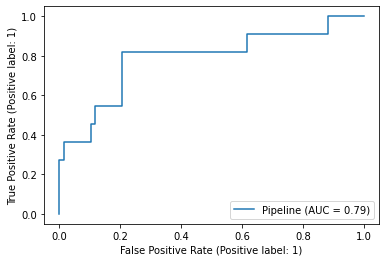

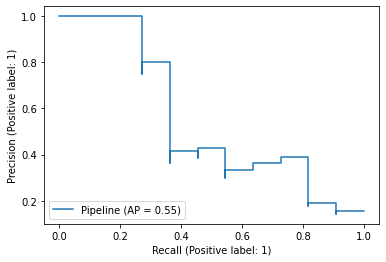

In [87]:
SAMPLING = True

# Load data
if SAMPLING: 
  [X_train, X_test, X_test_pred, y_train, y_test] = load_data() 
  X_test = encode_df(X_test)
else:
  [X_train, X_test_pred, y_train] = load_data()

X_train = encode_df(X_train)
X_test_pred = encode_df(X_test_pred)

# With Undersampling
print("------- WITH UNDERSAMPLING -------")
pipeline = Pipeline([('under', RandomUnderSampler(random_state=0)), ('scaler', StandardScaler()), ('classification', LogisticRegression(random_state=0, max_iter=10000))])

param_grid = {'under__sampling_strategy': [0.2, 0.25, 0.5, 0.75, 0.9, 0.99, 'majority'],
          'classification__penalty': ['l2'],
          'classification__C': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
          'classification__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
          'classification__class_weight': ["balanced", None]}

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "LogisticRegression_Undersampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/logisticRegressionUndersampling.csv", index=None)

------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------
Best: 0.910509 using {'classification__C': 0.01, 'classification__class_weight': None, 'classification__penalty': 'l2', 'classification__solver': 'liblinear'}
----------------- Metrics: -----------------
Mean Fit Time: 0.024295607672797308
Mean Accuracy Score: 0.8690297906602256
Mean Precision Score: 0.5823254754504754
Mean Recall Score: 0.585925925925926
Mean Roc-Auc Score: 0.900657848324515
Mean F1 Score: 0.5160985264735265


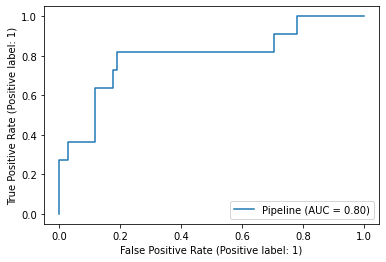

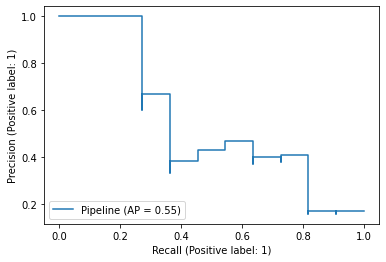

In [88]:
# Without Oversampling & Undersampling
print("------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------")
pipeline = Pipeline([('scaler', StandardScaler()), ('classification', LogisticRegression(random_state=0, max_iter=10000))])

param_grid = {'classification__penalty': ['l2'],
          'classification__C': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
          'classification__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
          'classification__class_weight': ["balanced", None]}

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "LogisticRegression", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/logisticRegression.csv", index=None)

------- WITH OVERSAMPLING -------
Best: 0.909134 using {'classification__C': 0.05, 'classification__class_weight': None, 'classification__penalty': 'l2', 'classification__solver': 'liblinear', 'smote__sampling_strategy': 0.2}
----------------- Metrics: -----------------
Mean Fit Time: 0.04951371018848722
Mean Accuracy Score: 0.8505476478030827
Mean Precision Score: 0.5079287808752094
Mean Recall Score: 0.666223544973545
Mean Roc-Auc Score: 0.8947995401864449
Mean F1 Score: 0.5359558184708745


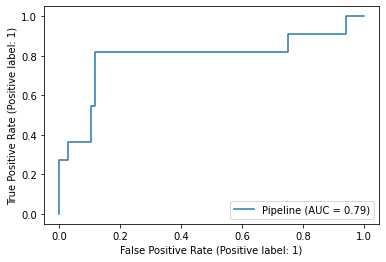

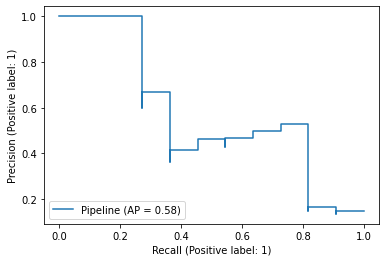

In [89]:
# With Oversampling
print("------- WITH OVERSAMPLING -------")
pipeline = Pipeline([('smote', SMOTE(random_state=0)), ('scaler', StandardScaler()), ('classification', LogisticRegression(random_state=0, max_iter=10000))])

weights = list(np.linspace(0.2, 0.9, 5)) + ['minority']
param_grid = {
        'smote__sampling_strategy': weights,
        'classification__penalty': ['l2'],
        'classification__C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
        'classification__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
        'classification__class_weight': ["balanced", None]}

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "LogisticRegression_Oversampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/logisticRegressionWithSMOTE.csv", index=None)

As a way to better understand the difference between the algorithm with Oversampling, Undersampling or none, we use the previously obtained ROC Curves and Precision-Recall plots and combine them for the different variations of the algorithm. In this case, they are all very similar.

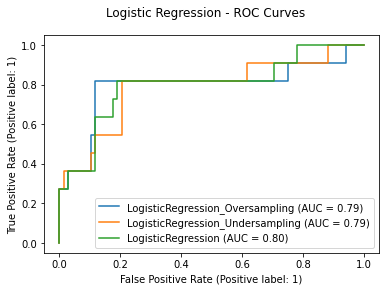

In [90]:
selectedAlgs = ["LogisticRegression_Oversampling", "LogisticRegression_Undersampling", "LogisticRegression"]
plotTitle = "Logistic Regression - ROC Curves"
displayROCCurve(plotTitle, selectedAlgs)

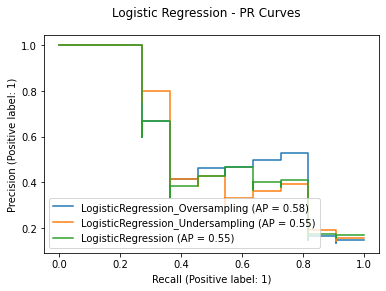

In [91]:
selectedAlgs = ["LogisticRegression_Oversampling", "LogisticRegression_Undersampling", "LogisticRegression"]
plotTitle = "Logistic Regression - PR Curves"
displayPRCurve(plotTitle, selectedAlgs)

# Random Forest Algorithm
Random Forest is a bag of Decision Trees meaning it's very good at preventing overfitting. It's a very slow algorithm as we will later see. As mentioned, we start by performing Undersampling, then nothing besides the model itself, and finally Oversampling. Also, we always encode data in numeric format whenever needed and in this case, no scaling is needed.

------- WITH UNDERSAMPLING -------
Best: 0.896396 using {'classification__class_weight': None, 'classification__criterion': 'entropy', 'classification__max_features': 'sqrt', 'classification__n_estimators': 250, 'under__sampling_strategy': 0.2}
----------------- Metrics: -----------------
Mean Fit Time: 0.6459539706508318
Mean Accuracy Score: 0.8446432165861515
Mean Precision Score: 0.5435182679974346
Mean Recall Score: 0.6429398148148148
Mean Roc-Auc Score: 0.876361469356261
Mean F1 Score: 0.5325686530547642


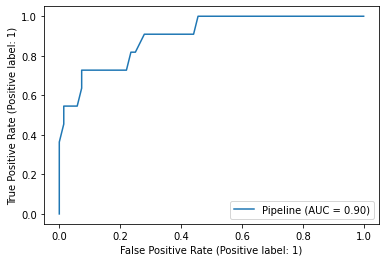

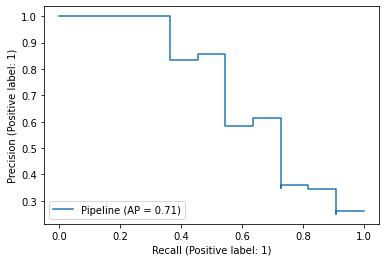

In [92]:
# Load data
if SAMPLING: 
  [X_train, X_test, X_test_pred, y_train, y_test] = load_data() 
  X_test = encode_df(X_test)
else:
  [X_train, X_test_pred, y_train] = load_data()

X_train = encode_df(X_train)
X_test_pred = encode_df(X_test_pred)

# With Undersampling
print("------- WITH UNDERSAMPLING -------")
pipeline = Pipeline([('under', RandomUnderSampler(random_state=0)), ('classification', RandomForestClassifier(random_state=0))])

param_grid = {'under__sampling_strategy': [0.2, 0.5, 0.75, 0.9],
            'classification__n_estimators': [50, 150, 250],
            'classification__max_features': ['sqrt', 'auto'],
            'classification__criterion': ['gini', 'entropy'],
            'classification__class_weight': ["balanced", "balanced_subsample", None],}

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "RandomForest_Undersampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/randomForestUndersampling.csv", index=None)

------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------
Best: 0.904428 using {'classification__class_weight': None, 'classification__criterion': 'entropy', 'classification__max_features': 'sqrt', 'classification__n_estimators': 50}
----------------- Metrics: -----------------
Mean Fit Time: 0.770194415251414
Mean Accuracy Score: 0.9105072463768117
Mean Precision Score: 0.7515740740740741
Mean Recall Score: 0.4359567901234568
Mean Roc-Auc Score: 0.8907631540270429
Mean F1 Score: 0.5263712522045856


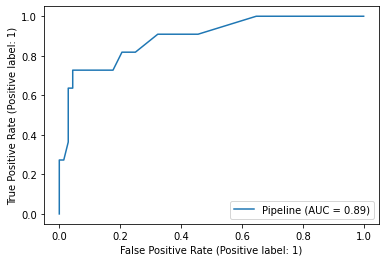

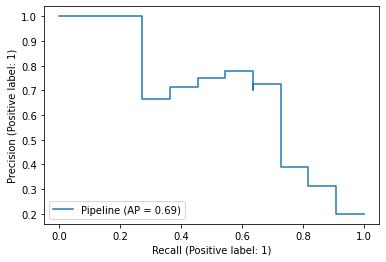

In [93]:
# Without Oversampling & Undersampling
print("------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------")
param_grid = {'classification__n_estimators': [50, 150, 250],
              'classification__max_features': ['sqrt', 'auto'],
              'classification__criterion': ['gini', 'entropy'],
              'classification__class_weight': ["balanced", "balanced_subsample", None],
            }

pipeline = Pipeline([('classification', RandomForestClassifier(random_state=0))])
results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "RandomForest", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/randomForest.csv", index=None)

------- WITH OVERSAMPLING -------
Best: 0.906888 using {'classification__class_weight': 'balanced_subsample', 'classification__criterion': 'entropy', 'classification__max_features': 'sqrt', 'classification__n_estimators': 250, 'smote__sampling_strategy': 0.375}
----------------- Metrics: -----------------
Mean Fit Time: 0.8461341494763339
Mean Accuracy Score: 0.9000575908033639
Mean Precision Score: 0.6851774691358025
Mean Recall Score: 0.5785493827160494
Mean Roc-Auc Score: 0.8923100075935724
Mean F1 Score: 0.5899517886091961


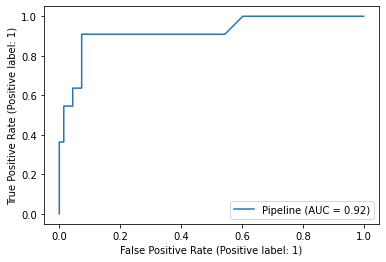

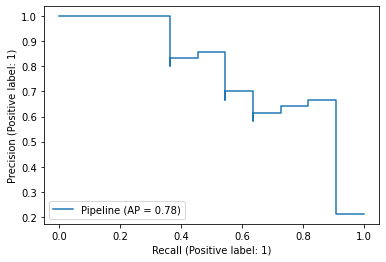

In [94]:
# With Oversampling
print("------- WITH OVERSAMPLING -------")
pipeline = Pipeline([('smote', SMOTE(random_state=0)), ('classification', RandomForestClassifier(random_state=0))])

weights = list(np.linspace(0.2, 0.9, 5)) + ['minority']
param_grid['smote__sampling_strategy'] = weights
results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "RandomForest_Oversampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/randomForestWithSMOTE.csv", index=None)

As a way to better understand the difference between the algorithm with Oversampling, Undersampling or none, we use the previously obtained ROC Curves and Precision-Recall plots and combine them for the different variations of the algorithm. In this case, we select Random Forest with Oversampling as our best variation because it's the one with higher AUC and Average Precision (AP).

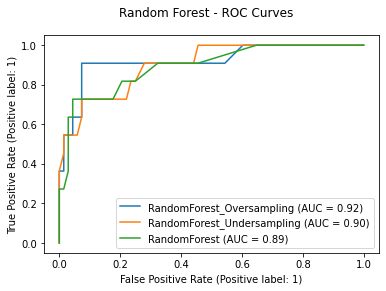

In [95]:
selectedAlgs = ["RandomForest_Oversampling", "RandomForest_Undersampling", "RandomForest"]
plotTitle = "Random Forest - ROC Curves"
displayROCCurve(plotTitle, selectedAlgs)

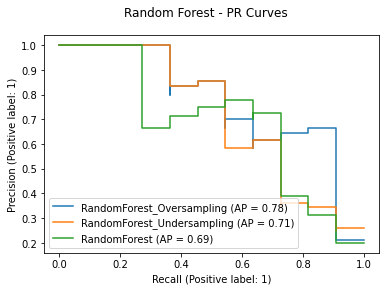

In [96]:
selectedAlgs = ["RandomForest_Oversampling", "RandomForest_Undersampling", "RandomForest"]
plotTitle = "Random Forest - PR Curves"
displayPRCurve(plotTitle, selectedAlgs)

# SVM Algorithm
A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite-dimensional space. As mentioned, we start by performing Undersampling, then nothing besides the model itself, and finally Oversampling. We also scale the data using the `min_max_scaling` function so that values are normalized between 0 and 1. Along with Logistic Regression, it was our worst algorithm.

In [97]:
def min_max_scaling(df, numeric_columns):
  # copy the dataframe
  df_norm = df.copy()
  # apply min-max scaling
  for column in numeric_columns:
      df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
      
  return df_norm


------- WITH UNDERSAMPLING -------
Best: 0.902474 using {'classification__C': 1, 'classification__gamma': 0.1, 'classification__kernel': 'rbf', 'under__sampling_strategy': 0.75}
----------------- Metrics: -----------------
Mean Fit Time: 0.030850302276157197
Mean Accuracy Score: 0.8210010351966874
Mean Precision Score: 0.3416297816662488
Mean Recall Score: 0.45649603174603176
Mean Roc-Auc Score: 0.8513437169312169
Mean F1 Score: 0.3408586364957592


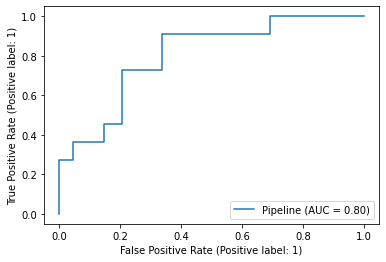

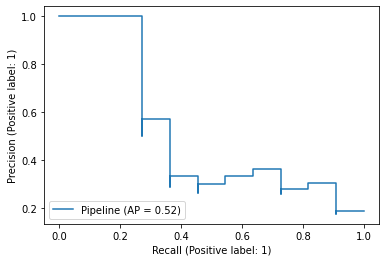

In [98]:
# https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

# Load data
numeric_features = list(X_train.select_dtypes(include=['int64', 'float64']))

if SAMPLING: 
  [X_train, X_test, X_test_pred, y_train, y_test] = load_data() 
  X_test = min_max_scaling(X_test, numeric_features)
else:
  [X_train, X_test_pred, y_train] = load_data()

X_train = min_max_scaling(X_train, numeric_features)
X_test_pred = min_max_scaling(X_test_pred, numeric_features)


# With Undersampling
print("------- WITH UNDERSAMPLING -------")
pipeline = Pipeline([('under', RandomUnderSampler(random_state=0)), ('classification', SVC(probability=True, random_state=0))])

param_grid = {'under__sampling_strategy': [0.2, 0.25, 0.5, 0.75, 0.9, 0.99, 'majority'],
            'classification__C': [0.1, 1, 10, 100, 1000],
            'classification__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'classification__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "SVM_Undersampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/SVMUndersampling.csv", index=None)


------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------
Best: 0.887427 using {'classification__C': 1, 'classification__gamma': 0.1, 'classification__kernel': 'rbf'}
----------------- Metrics: -----------------
Mean Fit Time: 0.023045786718527476
Mean Accuracy Score: 0.7180432895531402
Mean Precision Score: 0.3661024913134099
Mean Recall Score: 0.7979166666666666
Mean Roc-Auc Score: 0.8534441137566138
Mean F1 Score: 0.46567611694754546


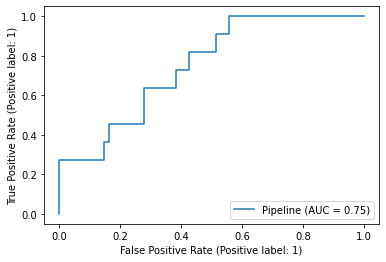

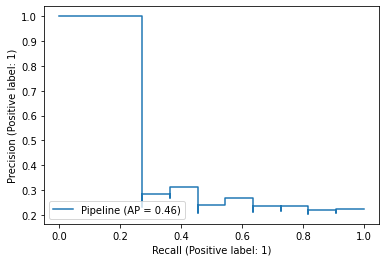

In [99]:
# Without Oversampling & Undersampling
print("------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------")

clf = Pipeline([('classification', SVC(probability=True, random_state=0))])

param_grid = {'classification__C': [0.1, 1, 10, 100],
              'classification__gamma': [1, 0.1, 0.01, 0.001],
              'classification__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "SVM", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/SVM.csv", index=None)

------- WITH OVERSAMPLING -------
Best: 0.914015 using {'classification__C': 1, 'classification__gamma': 0.01, 'classification__kernel': 'rbf', 'smote__sampling_strategy': 0.575}
----------------- Metrics: -----------------
Mean Fit Time: 0.07273291616390148
Mean Accuracy Score: 0.8459419975342191
Mean Precision Score: 0.3795531879142696
Mean Recall Score: 0.44147135416666666
Mean Roc-Auc Score: 0.8631473042052469
Mean F1 Score: 0.3668525345998481


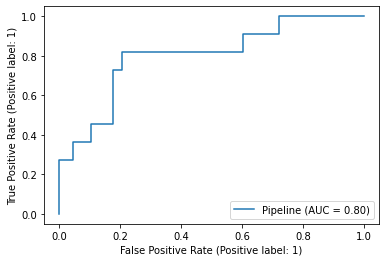

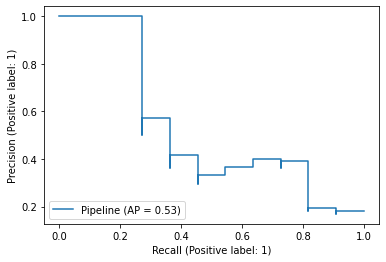

In [100]:
# With Oversampling
print("------- WITH OVERSAMPLING -------")
pipeline = Pipeline([('smote', SMOTE(random_state=0)), ('classification', SVC(probability=True, random_state=0))])

weights = list(np.linspace(0.25, 0.9, 5)) + ['minority']
param_grid['smote__sampling_strategy'] = weights

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "SVM_Oversampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/SVMWithSMOTE.csv", index=None)

As a way to better understand the difference between the algorithm with Oversampling, Undersampling or none, we use the previously obtained ROC Curves and Precision-Recall plots and combine them for the different variations of the algorithm. In this case, we select SVM with Oversampling as our best variation simply because it's slightly better than the one with Undersampling in the Precision-Recall plot.

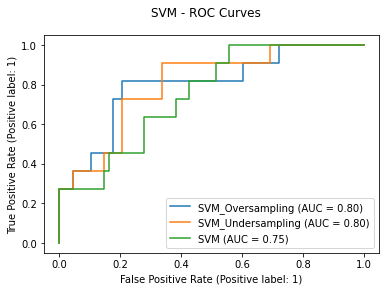

In [101]:
selectedAlgs = ["SVM_Oversampling", "SVM_Undersampling", "SVM"]
plotTitle = "SVM - ROC Curves"
displayROCCurve(plotTitle, selectedAlgs)

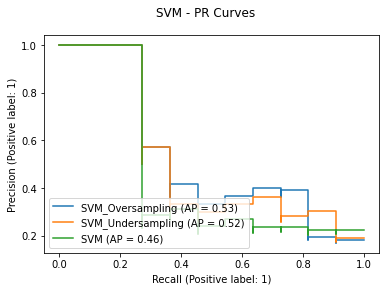

In [102]:
selectedAlgs = ["SVM_Oversampling", "SVM_Undersampling", "SVM"]
plotTitle = "SVM - PR Curves"
displayPRCurve(plotTitle, selectedAlgs)

# Light GBM Algorithm
Light GBM is a gradient boosting framework that uses tree-based learning algorithm. It's a light version of Gradient Boosting and was developed by Microsoft. As mentioned, we start by performing Undersampling, then nothing besides the model itself, and finally Oversampling. Also, we always encode data in numeric format whenever needed.

------- WITH UNDERSAMPLING -------
Best: 0.880357 using {'classifier__learning_rate': 0.01, 'classifier__max_depth': 25, 'classifier__n_estimators': 110, 'classifier__num_leaves': 10, 'under__sampling_strategy': 0.2}
----------------- Metrics: -----------------
Mean Fit Time: 0.05402624757937443
Mean Accuracy Score: 0.815414905394525
Mean Precision Score: 0.406680089949085
Mean Recall Score: 0.5572916666666666
Mean Roc-Auc Score: 0.8434911449147561
Mean F1 Score: 0.41814103721546964


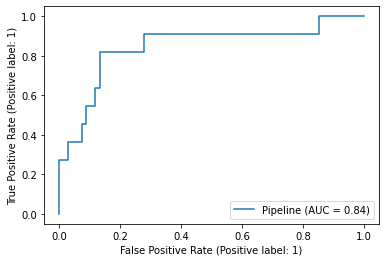

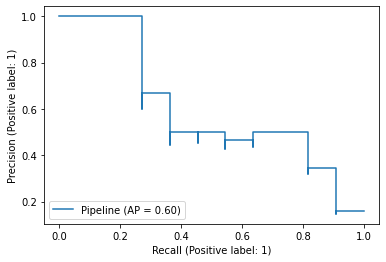

In [103]:
# Load data
if SAMPLING: 
  [X_train, X_test, X_test_pred, y_train, y_test] = load_data() 
  X_test = encode_df(X_test)
else:
  [X_train, X_test_pred, y_train] = load_data()

X_train = encode_df(X_train)
X_test_pred = encode_df(X_test_pred)

# With Undersampling
print("------- WITH UNDERSAMPLING -------")
pipeline = Pipeline([('under', RandomUnderSampler(random_state=0)), ('classifier', lgb.LGBMClassifier(random_state=0))])

param_grid = {'under__sampling_strategy': [0.2, 0.25, 0.5, 0.75, 0.9, 'majority'],
              'classifier__max_depth': [25, 50, 75],
              'classifier__learning_rate' : [0.01, 0.05, 0.1],
              'classifier__num_leaves': [int(x) for x in range(10, 100, 50)],
              'classifier__n_estimators': [int(x) for x in range(10, 200, 50)],
             }

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "LightGBM_Undersampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/lightGBMUndersampling.csv", index=None)

------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------
Best: 0.898525 using {'classifier__learning_rate': 0.1, 'classifier__max_depth': 25, 'classifier__n_estimators': 60, 'classifier__num_leaves': 2}
----------------- Metrics: -----------------
Mean Fit Time: 0.04868501502054709
Mean Accuracy Score: 0.8894977858293076
Mean Precision Score: 0.43509920634920635
Mean Recall Score: 0.25729166666666664
Mean Roc-Auc Score: 0.8578271053791887
Mean F1 Score: 0.307336860670194


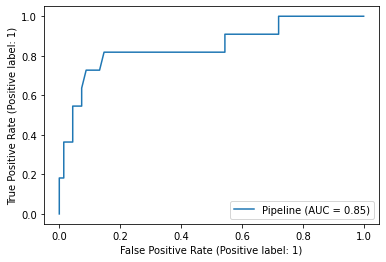

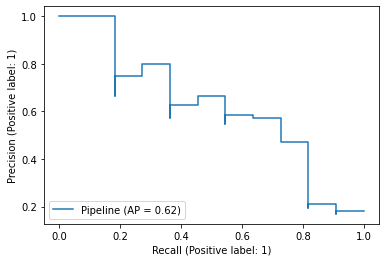

In [104]:
# Without Oversampling & Undersampling
print("------- WITHOUT OVERSAMPLING & UNDERSAMPLING -------")
pipeline = Pipeline([('classifier', lgb.LGBMClassifier(random_state=0))])

param_grid = {'classifier__max_depth': [25, 50, 75],
              'classifier__learning_rate' : [0.01, 0.05, 0.1],
              'classifier__num_leaves': [int(x) for x in range(2, 100, 50)],
              'classifier__n_estimators': [int(x) for x in range(10, 200, 50)],
             }

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "LightGBM", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/lightGBM.csv", index=None)

------- WITH OVERSAMPLING -------
Best: 0.895992 using {'classifier__learning_rate': 0.05, 'classifier__max_depth': 25, 'classifier__n_estimators': 110, 'classifier__num_leaves': 2, 'smote__sampling_strategy': 0.2}
----------------- Metrics: -----------------
Mean Fit Time: 0.07727985676424003
Mean Accuracy Score: 0.875727573134729
Mean Precision Score: 0.5579355790814123
Mean Recall Score: 0.46763117283950617
Mean Roc-Auc Score: 0.8545398846266902
Mean F1 Score: 0.4614344615079909


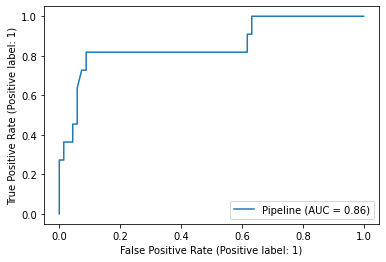

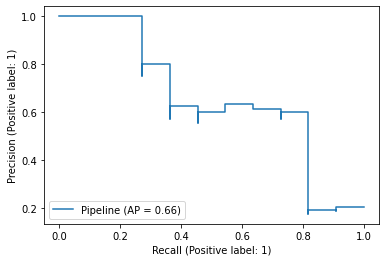

In [105]:
# With Oversampling
print("------- WITH OVERSAMPLING -------")
pipeline = Pipeline([('smote', SMOTE(random_state=0)), ('classifier', lgb.LGBMClassifier(random_state=0))])

weights = list(np.linspace(0.2, 0.9, 5)) + ['minority']
param_grid['smote__sampling_strategy'] = weights

results_df = run_model(pipeline, param_grid, X_train, y_train, X_test_pred, "LightGBM_Oversampling", X_test=X_test, y_test=y_test)
results_df.to_csv("./results/lightGBMSMOTE.csv", index=None)

As a way to better understand the difference between the algorithm with Oversampling, Undersampling or none, we use the previously obtained ROC Curves and Precision-Recall plots and combine them for the different variations of the algorithm. In this case, Light GBM with oversampling was our second best algorithm.

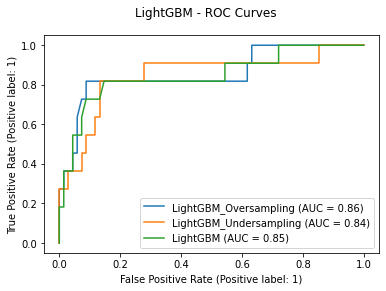

In [106]:
selectedAlgs = ["LightGBM_Oversampling", "LightGBM_Undersampling", "LightGBM"]
plotTitle = "LightGBM - ROC Curves"
displayROCCurve(plotTitle, selectedAlgs)

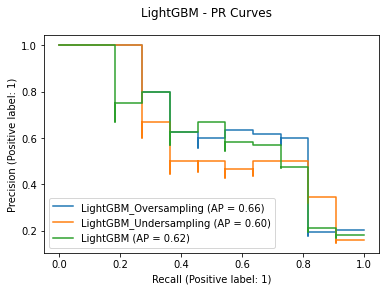

In [107]:
selectedAlgs = ["LightGBM_Oversampling", "LightGBM_Undersampling", "LightGBM"]
plotTitle = "LightGBM - PR Curves"
displayPRCurve(plotTitle, selectedAlgs)

# Barplots of all algorithms
To better analyse the difference between each variation of the algorithms, we created some barplots that compare the average metrics obtained in iterations of the `GridSearch`.

In [108]:
def algorithms_comparison_plot(algorithms, title, colors, selectedMetric):
  values = [metrics[alg][selectedMetric] for alg in algorithms]

  fig = plt.figure()

  if len(colors) == 3:
    ax = fig.add_axes([0,0,1.25,1])
  else:
    ax = fig.add_axes([0,0,1.75,1])

  ax.bar(algorithms, values, color=colors)
  plt.xlabel("\n\n" + title, fontdict={"weight": "bold"})
  plt.ylabel("\n\nValue", fontdict={"weight": "bold"})
  plt.show()

# Logistic Regression

### F1 Measure

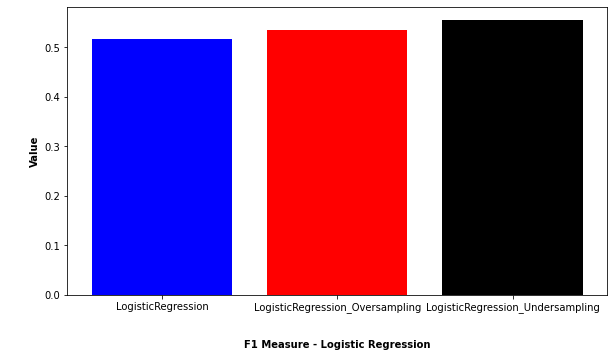

In [109]:
algorithms_comparison_plot(("LogisticRegression", "LogisticRegression_Oversampling", "LogisticRegression_Undersampling"), \
  "F1 Measure - Logistic Regression", ['blue', 'red', 'black'], "f1")

### Accuracy

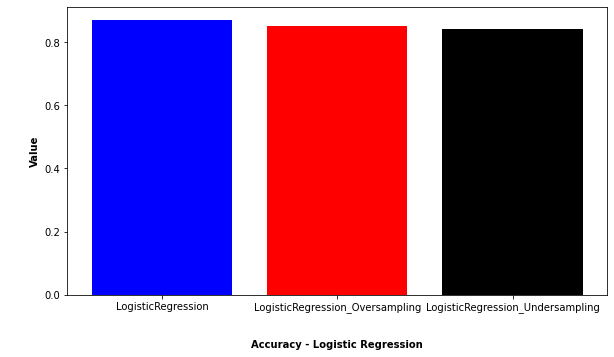

In [110]:
algorithms_comparison_plot(("LogisticRegression", "LogisticRegression_Oversampling", "LogisticRegression_Undersampling"), \
  "Accuracy - Logistic Regression", ['blue', 'red', 'black'], "accuracy")

### Precision

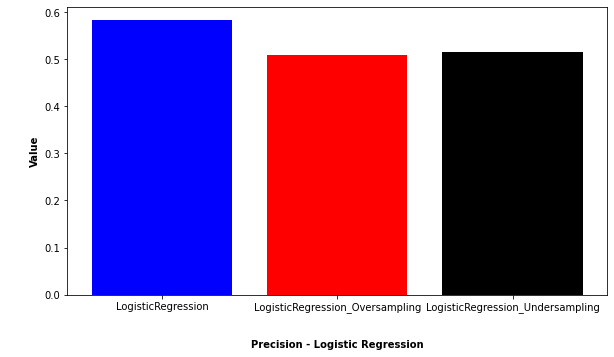

In [111]:
algorithms_comparison_plot(("LogisticRegression", "LogisticRegression_Oversampling", "LogisticRegression_Undersampling"), \
  "Precision - Logistic Regression", ['blue', 'red', 'black'], "precision")

### Recall

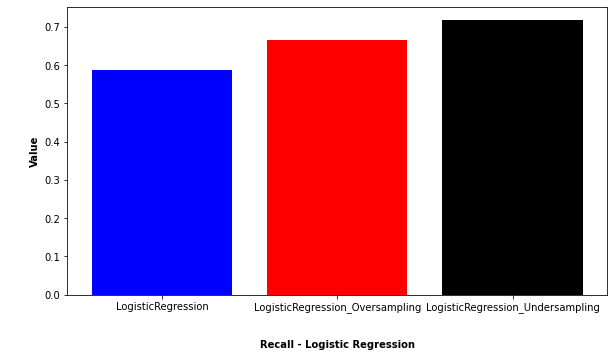

In [112]:
algorithms_comparison_plot(("LogisticRegression", "LogisticRegression_Oversampling", "LogisticRegression_Undersampling"), \
  "Recall - Logistic Regression", ['blue', 'red', 'black'], "recall")

### ROC-AUC

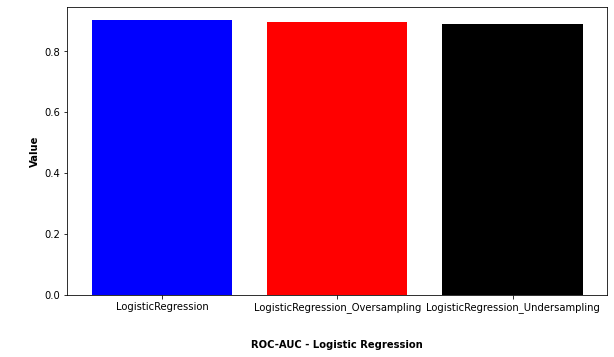

In [113]:
algorithms_comparison_plot(("LogisticRegression", "LogisticRegression_Oversampling", "LogisticRegression_Undersampling"), \
  "ROC-AUC - Logistic Regression", ['blue', 'red', 'black'], "roc_auc")

# Random Forest

### F1 Measure

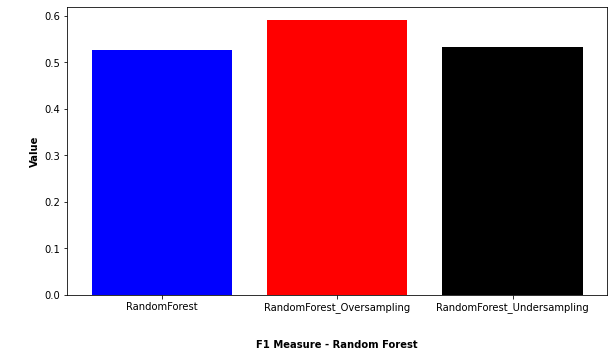

In [114]:
algorithms_comparison_plot(("RandomForest", "RandomForest_Oversampling", "RandomForest_Undersampling"), \
  "F1 Measure - Random Forest", ['blue', 'red', 'black'], "f1")

### Accuracy

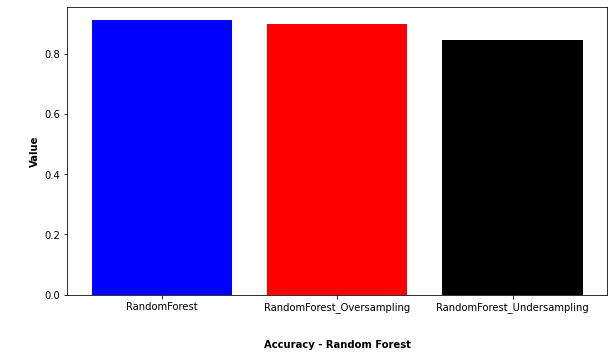

In [115]:
algorithms_comparison_plot(("RandomForest", "RandomForest_Oversampling", "RandomForest_Undersampling"), \
  "Accuracy - Random Forest", ['blue', 'red', 'black'], "accuracy")

### Precision

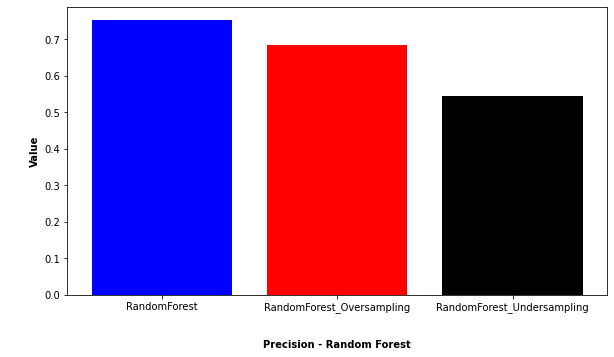

In [116]:
algorithms_comparison_plot(("RandomForest", "RandomForest_Oversampling", "RandomForest_Undersampling"), \
  "Precision - Random Forest", ['blue', 'red', 'black'], "precision")

### Recall

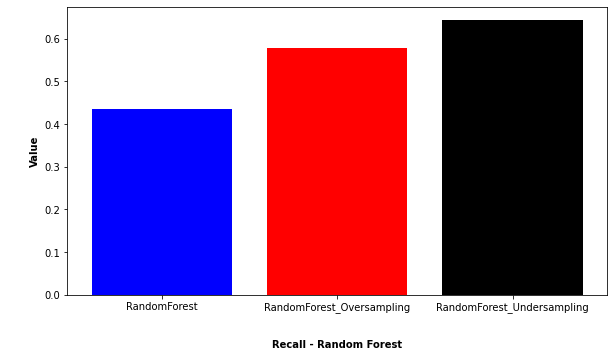

In [117]:
algorithms_comparison_plot(("RandomForest", "RandomForest_Oversampling", "RandomForest_Undersampling"), \
  "Recall - Random Forest", ['blue', 'red', 'black'], "recall")

### ROC-AUC

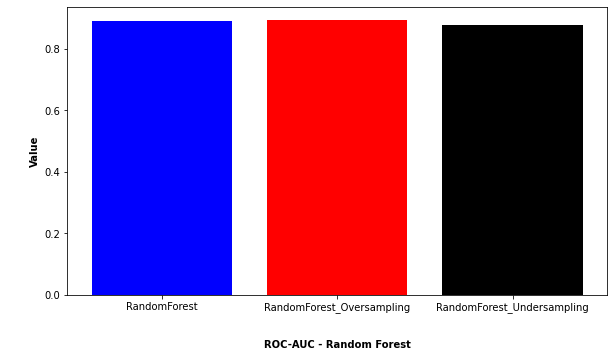

In [118]:
algorithms_comparison_plot(("RandomForest", "RandomForest_Oversampling", "RandomForest_Undersampling"), \
  "ROC-AUC - Random Forest", ['blue', 'red', 'black'], "roc_auc")

# SVM

### F1 Measure

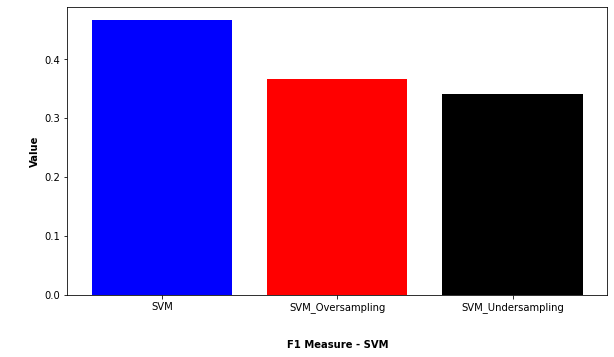

In [119]:
algorithms_comparison_plot(("SVM", "SVM_Oversampling", "SVM_Undersampling"), \
  "F1 Measure - SVM", ['blue', 'red', 'black'], "f1")

### Accuracy

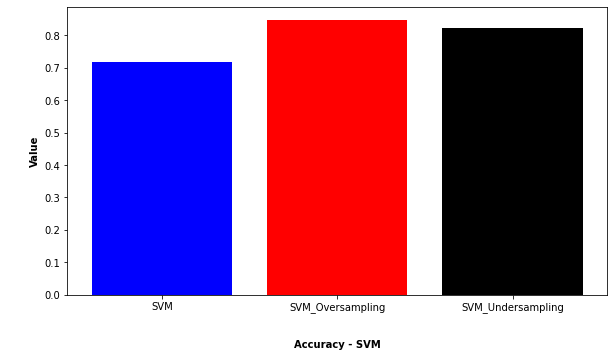

In [120]:
algorithms_comparison_plot(("SVM", "SVM_Oversampling", "SVM_Undersampling"), \
  "Accuracy - SVM", ['blue', 'red', 'black'], "accuracy")

### Precision

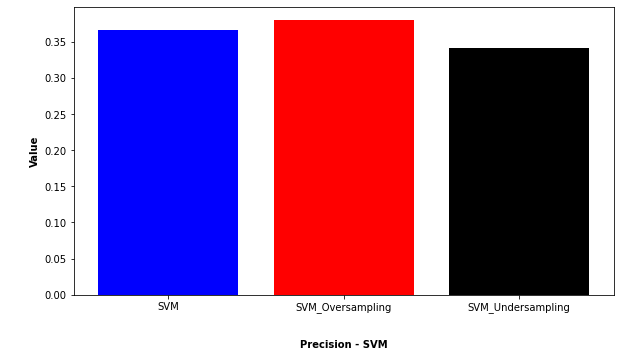

In [121]:
algorithms_comparison_plot(("SVM", "SVM_Oversampling", "SVM_Undersampling"), \
  "Precision - SVM", ['blue', 'red', 'black'], "precision")

### Recall

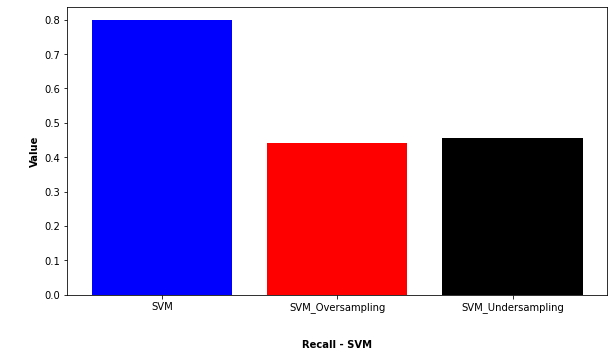

In [122]:
algorithms_comparison_plot(("SVM", "SVM_Oversampling", "SVM_Undersampling"), \
  "Recall - SVM", ['blue', 'red', 'black'], "recall")

### ROC-AUC

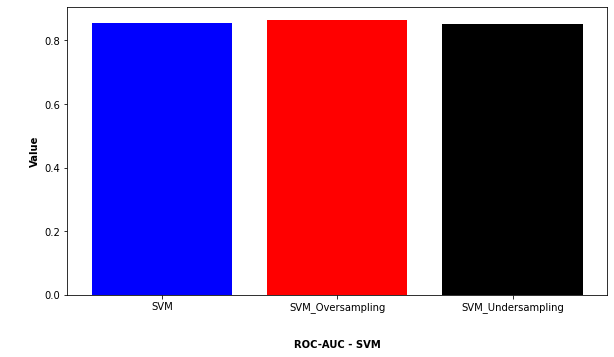

In [123]:
algorithms_comparison_plot(("SVM", "SVM_Oversampling", "SVM_Undersampling"), \
  "ROC-AUC - SVM", ['blue', 'red', 'black'], "roc_auc")

# Light GBM

### F1 Measure

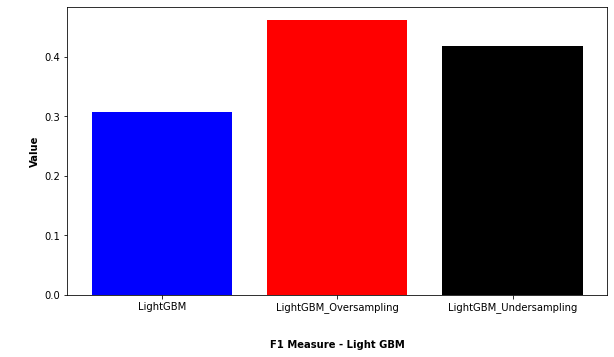

In [124]:
algorithms_comparison_plot(("LightGBM", "LightGBM_Oversampling", "LightGBM_Undersampling"), \
  "F1 Measure - Light GBM", ['blue', 'red', 'black'], "f1")

### Accuracy

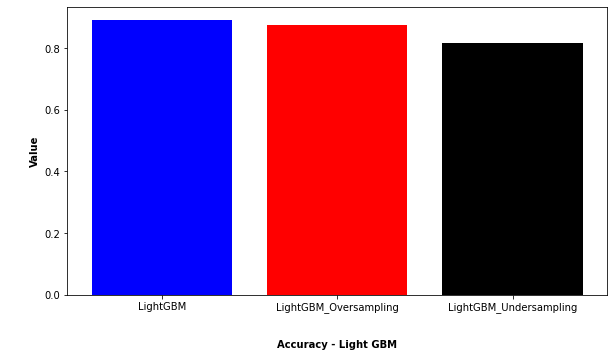

In [125]:
algorithms_comparison_plot(("LightGBM", "LightGBM_Oversampling", "LightGBM_Undersampling"), \
  "Accuracy - Light GBM", ['blue', 'red', 'black'], "accuracy")

### Precision

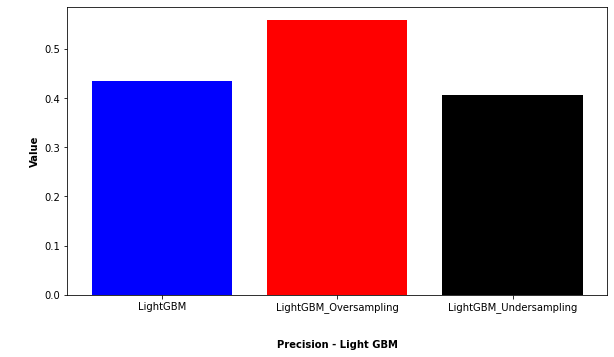

In [126]:
algorithms_comparison_plot(("LightGBM", "LightGBM_Oversampling", "LightGBM_Undersampling"), \
  "Precision - Light GBM", ['blue', 'red', 'black'], "precision")

### Recall

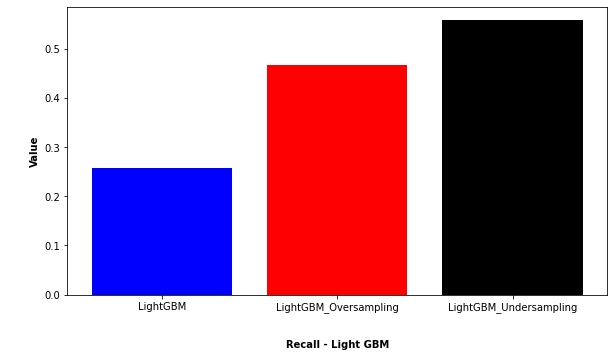

In [127]:
algorithms_comparison_plot(("LightGBM", "LightGBM_Oversampling", "LightGBM_Undersampling"), \
  "Recall - Light GBM", ['blue', 'red', 'black'], "recall")

### ROC-AUC

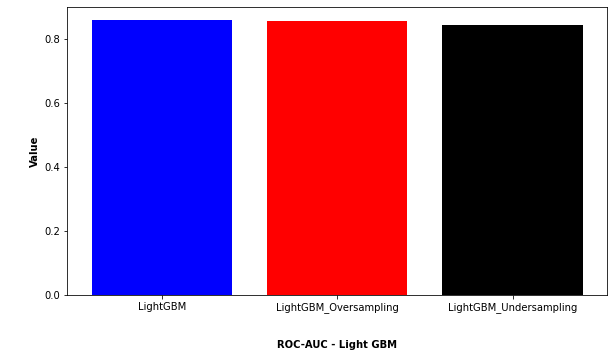

In [128]:
algorithms_comparison_plot(("LightGBM", "LightGBM_Oversampling", "LightGBM_Undersampling"), \
  "ROC-AUC - Light GBM", ['blue', 'red', 'black'], "roc_auc")

# Comparisons between best algorithms
Considering the results given for the **test** data, and by calculating the AUC and visualizing the Precision-Recall plots for each of the aforementioned algorithms, we conclude that the best algorithms were: **Logistic Regression**, **Random Forest with Oversampling**, **SVM with Oversampling**, and **Light GBM with Oversampling**. In the following sections, excluding the `Fit Time`, that is a metric only available for `GridSearch`, we present both the metrics obtained in `GridSearch` and against the testing data, respectively. The `ROC-AUC` metric is also only presented for the `GridSearch` as it will be presented exaclty after this section for the test data metrics.

In [129]:
best_algorithms = ("LogisticRegression", "RandomForest_Oversampling", "SVM_Oversampling", "LightGBM_Oversampling")
best_colors = ['blue', 'red', 'black', 'green']

### Fit Time
The fit time evaluates the average time taken by each iteration of `GridSearch` when running each of the presented algorithms. Here we can clearly see that Random Forest takes approximately 0.8 seconds per iteration while the other takes much less time.

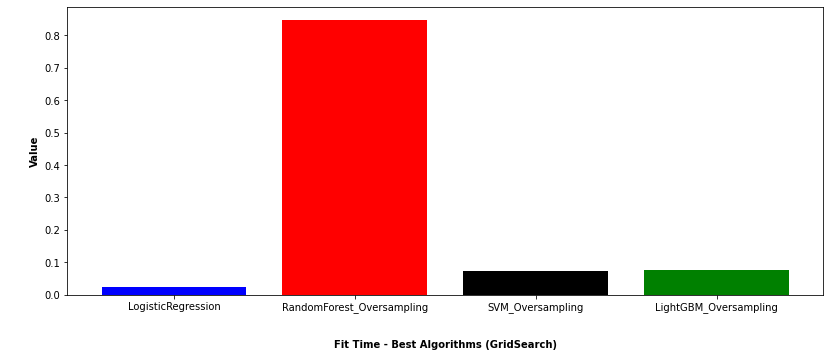

In [130]:
algorithms_comparison_plot(best_algorithms, "Fit Time - Best Algorithms (GridSearch)", best_colors, "fit_time")

### F1 Measure
Regarding the F1 Measure, the Random Forest with Oversampling is the "market leader" in both plots, beating all the other algorithms.

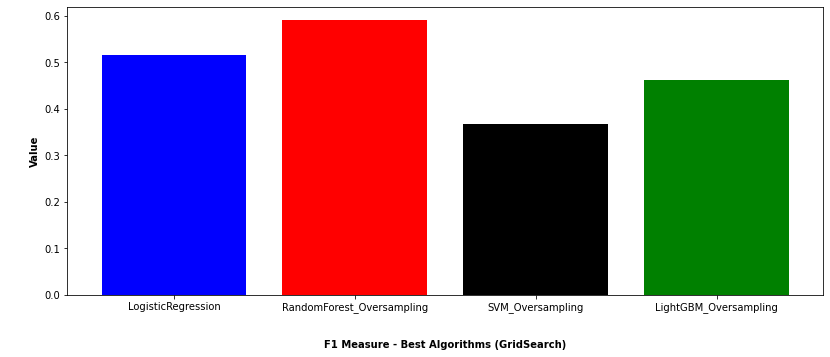

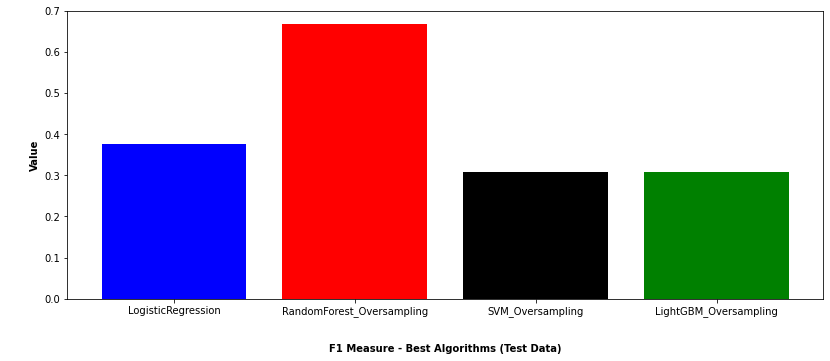

In [131]:
algorithms_comparison_plot(best_algorithms, "F1 Measure - Best Algorithms (GridSearch)", best_colors, "f1")
algorithms_comparison_plot(best_algorithms, "F1 Measure - Best Algorithms (Test Data)", best_colors, "test_f1")

### Accuracy
Very similar values for all algorithms in both plots.

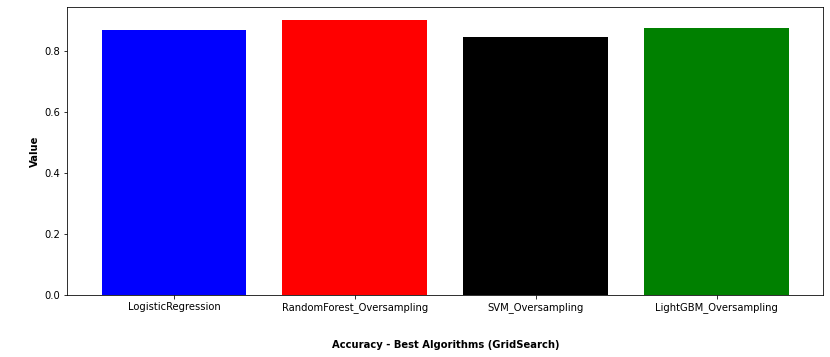

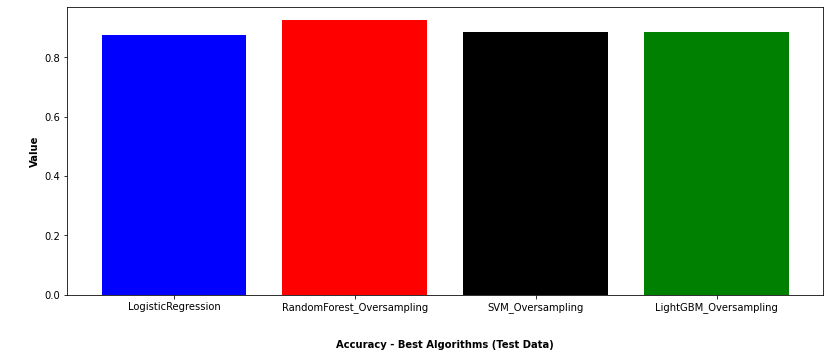

In [132]:
algorithms_comparison_plot(best_algorithms, "Accuracy - Best Algorithms (GridSearch)", best_colors, "accuracy")
algorithms_comparison_plot(best_algorithms, "Accuracy - Best Algorithms (Test Data)", best_colors, "test_accuracy")

### Precision
Again, Random Forest with Oversampling is the "market leader" in the `GridSearch` plot but surprisingly the precision in SVM and Light GBM both with Oversampling is approximately 1.

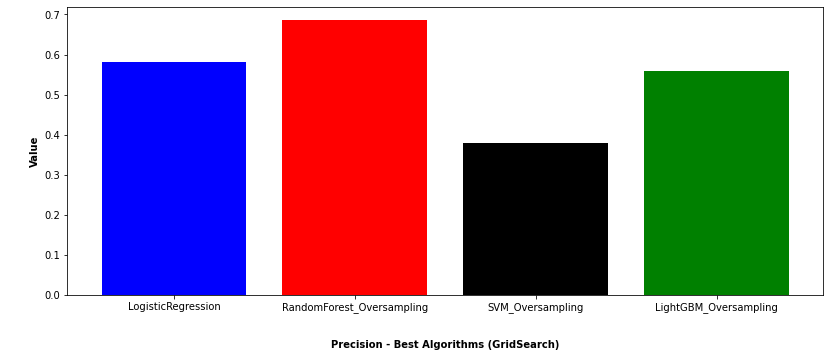

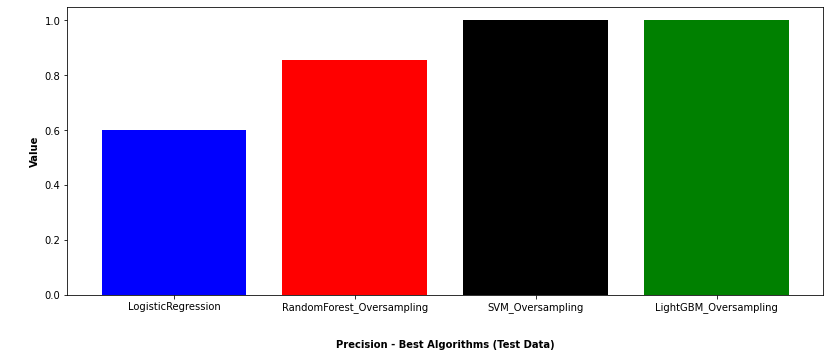

In [133]:
algorithms_comparison_plot(best_algorithms, "Precision - Best Algorithms (GridSearch)", best_colors, "precision")
algorithms_comparison_plot(best_algorithms, "Precision - Best Algorithms (Test Data)", best_colors, "test_precision")

### Recall
Random Forest with Oversampling WAS the best one. SVM and Light GBM, both with Oversampling had lower performances.

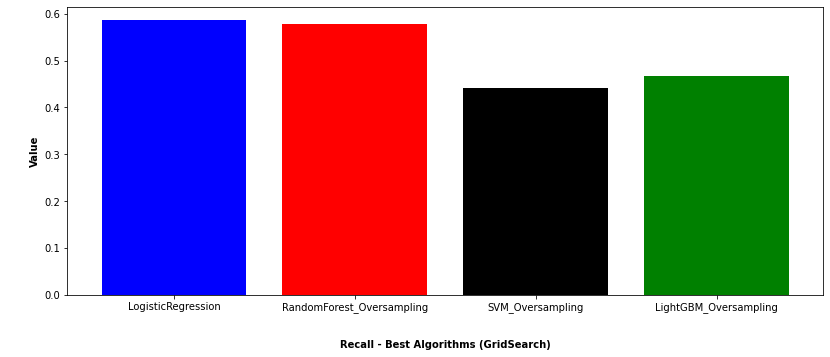

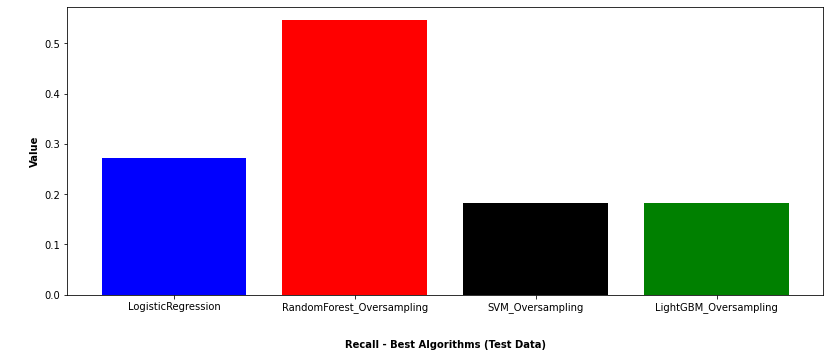

In [134]:
algorithms_comparison_plot(best_algorithms, "Recall - Best Algorithms (GridSearch)", best_colors, "recall")
algorithms_comparison_plot(best_algorithms, "Recall - Best Algorithms (Test Data)", best_colors, "test_recall")

### ROC-AUC
All the algorithms had high values, but when testing with data, Random Forest with Oversampling was clearly the winner.

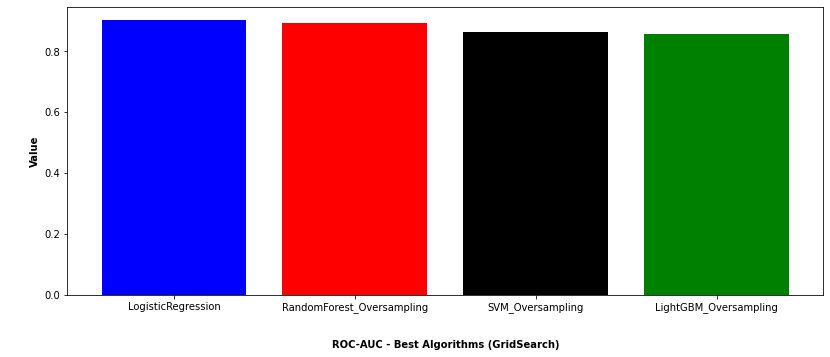

In [135]:
algorithms_comparison_plot(best_algorithms, "ROC-AUC - Best Algorithms (GridSearch)", best_colors, "roc_auc")

# Best Algorithms

# ROC Curves
At the last stage of the project, we compare the ROC Curves and Precision-Recall plots of the selected best algorithms. As stated before, Random Forest with Oversampling was our best model, while Logistic Regression and SVM with Oversampling were the worst, and Light GBM was in the mid-term. Those metrics were obtained for the **test** data.

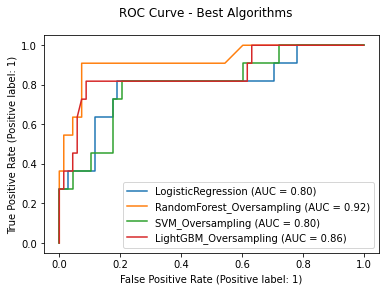

In [136]:
displayROCCurve("ROC Curve - Best Algorithms", best_algorithms)

# P-R Plots

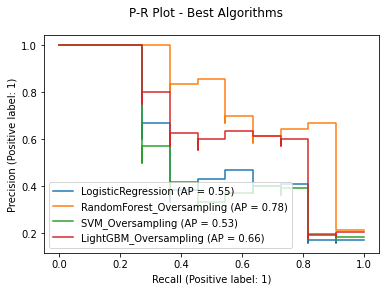

In [137]:
displayPRCurve("P-R Plot - Best Algorithms", best_algorithms)

# Conclusion
During this project, several ways to solve our classification problem were presented. We used many algorithms like Logistic Regression, Random Forest, SVM, and Light GBM. We had to make a lot of research and we started by pre-processing data by removing unwanted columns, handling missing values, eliminating outliers, removing columns with high correlation, performing Feature Engineering and Feature Selection. We deeply explored the data and used clustering techniques. We also performed Undersampling and Oversampling, and explored concepts like Cross-Validation, hyperparameter tuning, and Cost-Sensitive Learning to obtain the best possible model. It was a very challenging project that required a lot of research, but we think we achieved the proposed objectives for it. 